In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spacemissionsflightstatus/SpaceMissions.csv


In [2]:
data = pd.read_csv('/kaggle/input/spacemissionsflightstatus/SpaceMissions.csv')
data.head(10)

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason
0,SpaceX,24 March 2006,22:30,Marshall Islands,86.0,9.0,74.0,Falcon 1,343,470,22.25,1.5,FalconSAT-2,Research Satellite,19.5,Low Earth Orbit,Failure,Engine Fire During Launch
1,SpaceX,21 March 2007,1:10,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,DemoSat,Mass simulator,NaN,Low Earth Orbit,Failure,Engine Shutdown During Launch
2,SpaceX,3 August 2008,3:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Trailblazer,Communication Satellite,NaN,Low Earth Orbit,Failure,Collision During Launch
3,SpaceX,3 August 2008,3:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,"PRESat, NanoSail-D",Research Satellites,8,Low Earth Orbit,Failure,Collision During Launch
4,SpaceX,3 August 2008,3:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Explorers,Human Remains,NaN,Low Earth Orbit,Failure,Collision During Launch
5,SpaceX,8 October 2012,0:35,Cape Canaveral,77.0,5.0,100.0,Falcon 9 (v1.0),4940,10450,54.90,5.2,Orbcomm-OG2,Communication Satellite,150,Low Earth Orbit,Failure,Engine Failure During Flight
6,SpaceX,28 June 2015,14:21,Cape Canaveral,93.0,10.0,42.0,Falcon 9 (v1.1),5885,13150,68.40,5.2,SpaceX CRS-7,Space Station Supplies,1952,Low Earth Orbit,Failure,Vehicle Explosion During Flight
7,SpaceX,1 September 2016,13:07,Cape Canaveral,87.0,15.0,80.0,Falcon 9 Full Thrust (v1.2),6804,8300,70.00,5.2,Amos-6,Communication Satellite,5500,Geostationary Transfer Orbit,Failure,Vehicle Explosion Before Launch
8,Boeing,5 September 1995,11:10,Cape Canaveral,84.0,10.0,60.0,Delta II 7925,3511,1819,38.10,2.9,Koreasat 1,Communication Satellite,711,Geostationary Transfer Orbit,Failure,"One SRB failed to separate, retarding the boos..."
9,Boeing,17 January 1997,16:28,Cape Canaveral,50.0,12.0,62.0,Delta II 7925,3511,1819,38.10,2.9,GPS IIR-1,Global Positioning System,2030,Medium Earth Orbit,Failure,Exploded 13 seconds after launch due to SRB fa...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
Company                  150 non-null object
Launch Date              150 non-null object
Launch Time              146 non-null object
Launch Site              150 non-null object
Temperature (° F)        136 non-null float64
Wind speed (MPH)         136 non-null float64
Humidity (%)             136 non-null float64
Vehicle Type             150 non-null object
Liftoff Thrust (kN)      150 non-null int64
Payload to Orbit (kg)    150 non-null int64
Rocket Height (m)        150 non-null float64
Fairing Diameter (m)     146 non-null float64
Payload Name             150 non-null object
Payload Type             148 non-null object
Payload Mass (kg)        133 non-null object
Payload Orbit            150 non-null object
Mission Status           150 non-null object
Failure Reason           29 non-null object
dtypes: float64(5), int64(2), object(11)
memory usage: 21.2+ KB


## Null Values

In [4]:
data.isnull().sum()

Company                    0
Launch Date                0
Launch Time                4
Launch Site                0
Temperature (° F)         14
Wind speed (MPH)          14
Humidity (%)              14
Vehicle Type               0
Liftoff Thrust (kN)        0
Payload to Orbit (kg)      0
Rocket Height (m)          0
Fairing Diameter (m)       4
Payload Name               0
Payload Type               2
Payload Mass (kg)         17
Payload Orbit              0
Mission Status             0
Failure Reason           121
dtype: int64

In [5]:
#handling null temperature values
x = data.iloc[:, 4].values
x = x.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)
data.iloc[:, 4] = x
data.isnull().sum()

#handling null humidity values
x = data.iloc[:, 6].values
x = x.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)
data.iloc[:, 6] = x
data.isnull().sum()

#handling null wind speed values
x = data.iloc[:, 5].values
x = x.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)
data.iloc[:, 5] = x
data.isnull().sum()

Company                    0
Launch Date                0
Launch Time                4
Launch Site                0
Temperature (° F)          0
Wind speed (MPH)           0
Humidity (%)               0
Vehicle Type               0
Liftoff Thrust (kN)        0
Payload to Orbit (kg)      0
Rocket Height (m)          0
Fairing Diameter (m)       4
Payload Name               0
Payload Type               2
Payload Mass (kg)         17
Payload Orbit              0
Mission Status             0
Failure Reason           121
dtype: int64

In [6]:
#handling fairing diameter missing values
data[data["Fairing Diameter (m)"].isnull()]

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason
21,European Space Agency,23 May 1980,14:29,Guiana Space Centre,70.441176,8.007353,76.066176,Ariane 1,2772,1850,50.00,NaN,CAT-2 / Amsat P3A / Firewheel Subsat,Communication Satellite,NaN,Geostationary Transfer Orbit,Failure,Combustion instability that had occurred in on...
22,European Space Agency,9 September 1982,2:12,Guiana Space Centre,70.441176,8.007353,76.066176,Ariane 1,2772,1850,50.00,NaN,MARCES-B / Sirio-2,Communication Satellite,1710,Geostationary Transfer Orbit,Failure,Third stage turbopump malfunction.
28,Arianespace,4 June 1996,12:34,Guiana Space Centre,70.441176,8.007353,76.066176,Ariane 5 G,11400,6900,52.00,NaN,Cluster,European Space Agency spacecraft,NaN,High Earth Orbit,Failure,The Ariane 5 program's first launch failed bec...
29,Arianespace,1 December 1994,22:57,Guiana Space Centre,70.441176,8.007353,76.066176,Ariane 42P,4334,2930,58.72,NaN,Panamsat-3,Communication Satellite,2920,Geostationary Transfer Orbit,Failure,NaN


In [7]:
fm_arienaspace = data[data['Company'] == 'Arianespace']
list_1 = fm_arienaspace['Fairing Diameter (m)']

from statistics import mean
a = list_1.mean()

for a,b in zip(data['Company'], data['Fairing Diameter (m)']):
    if a == 'Arianespace'or a == 'European Space Agency':
         data["Fairing Diameter (m)"] = data["Fairing Diameter (m)"].fillna(a)

data.isnull().sum()




Company                    0
Launch Date                0
Launch Time                4
Launch Site                0
Temperature (° F)          0
Wind speed (MPH)           0
Humidity (%)               0
Vehicle Type               0
Liftoff Thrust (kN)        0
Payload to Orbit (kg)      0
Rocket Height (m)          0
Fairing Diameter (m)       0
Payload Name               0
Payload Type               2
Payload Mass (kg)         17
Payload Orbit              0
Mission Status             0
Failure Reason           121
dtype: int64

In [8]:
#handling Payload Type missing values
data[data['Payload Type'].isnull()]

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason
30,SpaceX,28 September 2008,23:15,Marshall Islands,70.441176,8.007353,76.066176,Falcon 1,343,470,22.25,1.5,RatSat (DemoSat),NaN,165,Low Earth Orbit,Success,NaN
32,SpaceX,4 June 2010,18:45,Cape Canaveral,78.000000,7.000000,88.000000,Falcon 9 (v1.0),4940,10450,54.90,5.2,Dragon Spacecraft Qualification Unit,NaN,NaN,Low Earth Orbit,Success,NaN


In [9]:
#checking for the most frequent payload type in company spacex
fm_arienaspace = data[data['Company'] == 'SpaceX']
fm_arienaspace['Payload Type'].describe()

count                          94
unique                         24
top       Communication Satellite
freq                           45
Name: Payload Type, dtype: object

In [10]:
#filling nan w/most frequent payload type in  SpaceX
data['Payload Type'] = data['Payload Type'].fillna('Communication Satellite')
data.isnull().sum()

Company                    0
Launch Date                0
Launch Time                4
Launch Site                0
Temperature (° F)          0
Wind speed (MPH)           0
Humidity (%)               0
Vehicle Type               0
Liftoff Thrust (kN)        0
Payload to Orbit (kg)      0
Rocket Height (m)          0
Fairing Diameter (m)       0
Payload Name               0
Payload Type               0
Payload Mass (kg)         17
Payload Orbit              0
Mission Status             0
Failure Reason           121
dtype: int64

In [11]:
#handling payload mass nan values
a = data[data['Payload Mass (kg)'].isnull()]
a['Payload Name'].unique()


array(['DemoSat', 'Trailblazer', 'Explorers', 'Orion 3',
       'DemoSat / 3CS-1 & 2', 'IDCSP GGTS-2', 'LCS-2',
       'CAT-2 / Amsat P3A / Firewheel Subsat', 'Cluster',
       'Dragon Spacecraft Qualification Unit', 'SpaceX CRS (Dragon C1)',
       'SpaceX CRS (Dragon C2+)', 'OG2 Mission 1 (6 OG2 Satellites)',
       'OG2 Mission 2 (11 OG2 Satellites)', 'STP-2', 'MS-11', 'BONUM-1'],
      dtype=object)

In [12]:
data['Payload Mass (kg)'].unique()

array(['19.5', nan, '8', '150', '1952', '5500', '711', '2030', '700',
       '2750', '3000', '0', '1710', '115', '80', '74', '1197', '5480',
       '2920', '165', '180', '500', '677', '3170', '3325', '2296', '4535',
       '4428', '2216', '2395', '570', '4159', '1898', '4707', '553',
       '5271', '3136', '4696', '3100', '3600', '2257', '4600', '9600',
       '2490', '5600', '5300', 'Classified', '6070', '2708', '3669',
       '6761', '3310', '475', '4990', '5200', '3500', '2205', '4230',
       '1300', '2141', '6092', '2647', '362', '5960', '5400', '2700',
       '7080', '5800', '7060', '2573', '3880', '5380', '6000', '2500',
       '13620', '4200', '6500', '15600', '6956', '6350', '338', '290',
       '305', '2450', '2200', '550', '1360', '2032', '210', '4348', '673',
       '758', '1800', '835', '636', '1100', '660', '689', '3117', '328',
       '970'], dtype=object)

In [13]:
#converting the classified rows to numerical data and changing dtype of payloadmass to int
data.loc[ data['Payload Mass (kg)'] == 'Classified', 'Payload Mass (kg)'] = 0
data['Payload Mass (kg)'] = data['Payload Mass (kg)'].astype(float)
data['Payload Mass (kg)'].unique()

array([1.950e+01,       nan, 8.000e+00, 1.500e+02, 1.952e+03, 5.500e+03,
       7.110e+02, 2.030e+03, 7.000e+02, 2.750e+03, 3.000e+03, 0.000e+00,
       1.710e+03, 1.150e+02, 8.000e+01, 7.400e+01, 1.197e+03, 5.480e+03,
       2.920e+03, 1.650e+02, 1.800e+02, 5.000e+02, 6.770e+02, 3.170e+03,
       3.325e+03, 2.296e+03, 4.535e+03, 4.428e+03, 2.216e+03, 2.395e+03,
       5.700e+02, 4.159e+03, 1.898e+03, 4.707e+03, 5.530e+02, 5.271e+03,
       3.136e+03, 4.696e+03, 3.100e+03, 3.600e+03, 2.257e+03, 4.600e+03,
       9.600e+03, 2.490e+03, 5.600e+03, 5.300e+03, 6.070e+03, 2.708e+03,
       3.669e+03, 6.761e+03, 3.310e+03, 4.750e+02, 4.990e+03, 5.200e+03,
       3.500e+03, 2.205e+03, 4.230e+03, 1.300e+03, 2.141e+03, 6.092e+03,
       2.647e+03, 3.620e+02, 5.960e+03, 5.400e+03, 2.700e+03, 7.080e+03,
       5.800e+03, 7.060e+03, 2.573e+03, 3.880e+03, 5.380e+03, 6.000e+03,
       2.500e+03, 1.362e+04, 4.200e+03, 6.500e+03, 1.560e+04, 6.956e+03,
       6.350e+03, 3.380e+02, 2.900e+02, 3.050e+02, 

In [14]:
#handling null values and changing dtype to int
x = data.iloc[:, -4].values
x = x.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)
data.iloc[:, -4] = x

data['Payload Mass (kg)'] = data['Payload Mass (kg)'].astype(int)
data.isnull().sum()

Company                    0
Launch Date                0
Launch Time                4
Launch Site                0
Temperature (° F)          0
Wind speed (MPH)           0
Humidity (%)               0
Vehicle Type               0
Liftoff Thrust (kN)        0
Payload to Orbit (kg)      0
Rocket Height (m)          0
Fairing Diameter (m)       0
Payload Name               0
Payload Type               0
Payload Mass (kg)          0
Payload Orbit              0
Mission Status             0
Failure Reason           121
dtype: int64

In [15]:
data['Launch Time'].describe()

count      146
unique     132
top       3:34
freq         3
Name: Launch Time, dtype: object

In [16]:
#handling the null launch time values
x = data.iloc[:, 2].values
x = x.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(x)
x = imputer.transform(x)
data.iloc[:, 2] = x

In [17]:
#drop the failure reason column
data = data.drop(['Failure Reason'], axis = 1)

## Categorical Data

In [18]:
#Company
data['Company'].unique()

array(['SpaceX', 'Boeing', 'Martin Marietta', 'US Air Force',
       'European Space Agency', 'Brazilian Space Agency', 'Arianespace'],
      dtype=object)

In [19]:
data.loc[data['Company'] == 'SpaceX', 'Company'] = 0
data.loc[data['Company'] == 'Boeing', 'Company'] = 1
data.loc[data['Company'] == 'Martin Marietta', 'Company'] = 2
data.loc[data['Company'] == 'US Air Force', 'Company'] = 3
data.loc[data['Company'] == 'European Space Agency', 'Company'] = 4
data.loc[data['Company'] == 'Brazilian Space Agency', 'Company'] = 5
data.loc[data['Company'] == 'Arianespace', 'Company'] = 6

In [20]:
data['Company'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [21]:
#Launch Site
data['Launch Site'].unique()

array(['Marshall Islands', 'Cape Canaveral', 'Vandenberg ',
       ' Guiana Space Centre', 'Alcântara Launch Center',
       'Kennedy Space Center'], dtype=object)

In [22]:
data.loc[data['Launch Site'] == 'Marshall Islands', 'Launch Site'] = 0
data.loc[data['Launch Site'] == 'Cape Canaveral', 'Launch Site'] = 1
data.loc[data['Launch Site'] == 'Vandenberg ', 'Launch Site'] = 2
data.loc[data['Launch Site'] == ' Guiana Space Centre', 'Launch Site'] = 3
data.loc[data['Launch Site'] == 'Alcântara Launch Center', 'Launch Site'] = 4
data.loc[data['Launch Site'] == 'Kennedy Space Center', 'Launch Site'] = 5

In [23]:
data = data.rename({'Vehicle Type': "Vehicle_Type"}, axis = 1)
data['Vehicle_Type'].unique()

array(['Falcon 1', 'Falcon 9 (v1.0)', 'Falcon 9 (v1.1)',
       'Falcon 9 Full Thrust (v1.2)', 'Delta II 7925', 'Delta III 8930',
       'Delta IV Heavy', 'Titan II(23)G', 'Titan IIIC', 'Titan III(24)B',
       'Titan IIIB', 'Titan IIIA', 'Ariane 1', 'VLS-1', 'Vega',
       'Ariane 5 ECA', 'Ariane 5 G', 'Ariane 42P', 'Falcon 9 Block 3',
       'Falcon 9 Block 4', 'Falcon Heavy', 'Falcon 9 Block 5',
       'Delta II 7920-10C', 'Delta II 7425', 'Delta II 7426',
       'Delta II 7920-10', 'Delta II 7420-10C', 'Delta II 7320-10C',
       'Delta II 7326', 'Delta II 7425-10C', 'Delta IV Medium+ (4,2)'],
      dtype=object)

In [24]:
#Vehicle Type
titles = {"Falcon": 0, "Delta": 1, "Titan": 2, "Ariane": 3, "Vega": 4, "VLS": 5}

# extract titles
data['vehicle_type'] = data.Vehicle_Type.str.extract('([A-Za-z]+)', expand=False)
# convert titles into numbers
data['vehicle_type'] = data['vehicle_type'].map(titles)  

data = data.drop(['Vehicle_Type'], axis=1)
data.head()

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,vehicle_type
0,0,24 March 2006,22:30,0,86.000000,9.000000,74.000000,343,470,22.25,1.5,FalconSAT-2,Research Satellite,19,Low Earth Orbit,Failure,0
1,0,21 March 2007,1:10,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,DemoSat,Mass simulator,3443,Low Earth Orbit,Failure,0
2,0,3 August 2008,3:34,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,Trailblazer,Communication Satellite,3443,Low Earth Orbit,Failure,0
3,0,3 August 2008,3:34,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,"PRESat, NanoSail-D",Research Satellites,8,Low Earth Orbit,Failure,0
4,0,3 August 2008,3:34,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,Explorers,Human Remains,3443,Low Earth Orbit,Failure,0


In [25]:
# Payload Name and Type
#too much unique values, we're gonna have to drop them
data = data.drop(['Payload Name', 'Payload Type'], axis = 1)

In [26]:
#Payload Orbit
data['Payload Orbit'].unique()

array(['Low Earth Orbit', 'Geostationary Transfer Orbit',
       'Medium Earth Orbit', 'Sun-Synchronous Orbit', 'Polar Orbit',
       'High Earth Orbit', 'Sun/Earth Orbit', 'Heliocentric Orbit',
       'Suborbital', 'Mars Orbit', 'Earth-Moon L2'], dtype=object)

In [27]:
data.loc[data['Payload Orbit'] == 'Low Earth Orbit', 'Payload Orbit'] = 0
data.loc[data['Payload Orbit'] == 'Geostationary Transfer Orbit', 'Payload Orbit'] = 1
data.loc[data['Payload Orbit'] == 'Medium Earth Orbit', 'Payload Orbit'] = 2
data.loc[data['Payload Orbit'] == 'Sun-Synchronous Orbit', 'Payload Orbit'] = 3
data.loc[data['Payload Orbit'] == 'Polar Orbit', 'Payload Orbit'] = 4
data.loc[data['Payload Orbit'] == 'High Earth Orbit', 'Payload Orbit'] = 5
data.loc[data['Payload Orbit'] == 'Sun/Earth Orbit', 'Payload Orbit'] = 6
data.loc[data['Payload Orbit'] == 'Heliocentric Orbit', 'Payload Orbit'] = 7
data.loc[data['Payload Orbit'] == 'Suborbital', 'Payload Orbit'] = 8
data.loc[data['Payload Orbit'] == 'Mars Orbit', 'Payload Orbit'] = 9
data.loc[data['Payload Orbit'] == 'Earth-Moon L2', 'Payload Orbit'] = 10

In [28]:
#Mission Status
data.loc[data['Mission Status'] == 'Failure', 'Mission Status'] = 0
data.loc[data['Mission Status'] == 'Success', 'Mission Status'] = 1

In [29]:
data.head()

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Mass (kg),Payload Orbit,Mission Status,vehicle_type
0,0,24 March 2006,22:30,0,86.000000,9.000000,74.000000,343,470,22.25,1.5,19,0,0,0
1,0,21 March 2007,1:10,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,3443,0,0,0
2,0,3 August 2008,3:34,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,3443,0,0,0
3,0,3 August 2008,3:34,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,8,0,0,0
4,0,3 August 2008,3:34,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,3443,0,0,0


In [30]:
# Launch Date and Launch Time
data['Launch Date'] = data['Launch Date'].astype(str)
data['Launch Time'] = data['Launch Time'].astype(str)
#merging the columns
data['Launch_Time'] = data['Launch Date'].str.cat(data['Launch Time'],sep=" ")
data = data.drop(['Launch Time', 'Launch Date'], axis = 1)
data.head()

,Company,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Mass (kg),Payload Orbit,Mission Status,vehicle_type,Launch_Time
0,0,0,86.000000,9.000000,74.000000,343,470,22.25,1.5,19,0,0,0,24 March 2006 22:30
1,0,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,3443,0,0,0,21 March 2007 1:10
2,0,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,3443,0,0,0,3 August 2008 3:34
3,0,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,8,0,0,0,3 August 2008 3:34
4,0,0,70.441176,8.007353,76.066176,343,470,22.25,1.5,3443,0,0,0,3 August 2008 3:34


In [31]:
#convert to datetime
from datetime import datetime
data['Launch_Time'] = data['Launch_Time'].map(lambda x: datetime.strptime(x, '%d %B %Y %H:%M'))

In [32]:
# Fairing Diameter (European Space Agency)
data['Fairing Diameter (m)'].unique()

array([1.5, 5.2, 2.9, 4.0, 5.1, 3.0, 1.52, 'European Space Agency', 1.0,
       2.6, 5.4], dtype=object)

In [33]:
data.loc[data['Fairing Diameter (m)'] == "European Space Agency", 'Fairing Diameter (m)'] = 5.2

In [34]:
#Fairing diameter
data['Fairing Diameter (m)'].unique()

array([1.5, 5.2, 2.9, 4.0, 5.1, 3.0, 1.52, 1.0, 2.6, 5.4], dtype=object)

In [35]:
for a in data['Fairing Diameter (m)']:
    if a == 'European Space Agency':
        a = 5.2
        

# data['Fairing Diameter (m)'].unique()

## Different variable realtion to Mission Status

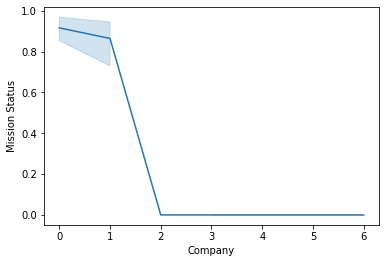

In [36]:
# Company
sns.lineplot(x='Company', y='Mission Status', data=data)


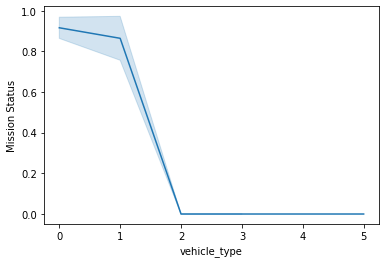

In [37]:
#vehicle type
sns.lineplot(x='vehicle_type', y='Mission Status', data=data)

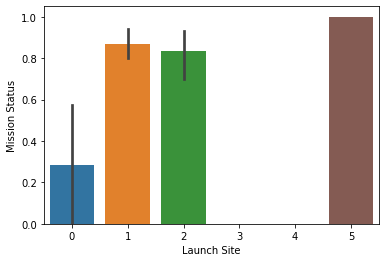

In [38]:
#launch site
sns.barplot(x='Launch Site', y='Mission Status', data=data)

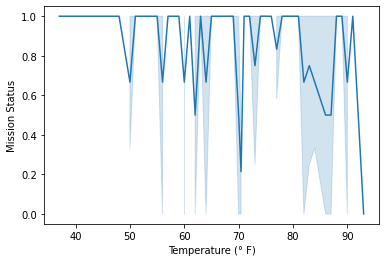

In [39]:
# Temperature
sns.lineplot(x='Temperature (° F)', y='Mission Status', data=data)

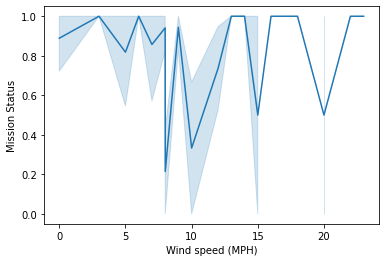

In [40]:
#wind speed
sns.lineplot(x='Wind speed (MPH)', y='Mission Status', data=data)

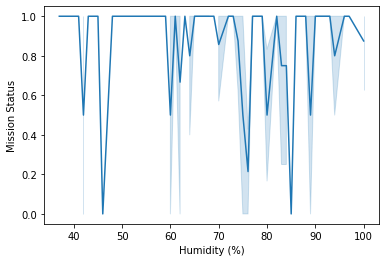

In [41]:
#humidity
sns.lineplot(x='Humidity (%)', y='Mission Status', data=data)

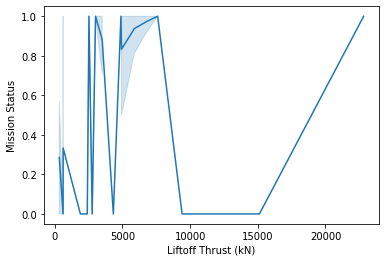

In [42]:
#liftoff thrust
sns.lineplot(x='Liftoff Thrust (kN)', y='Mission Status', data=data)

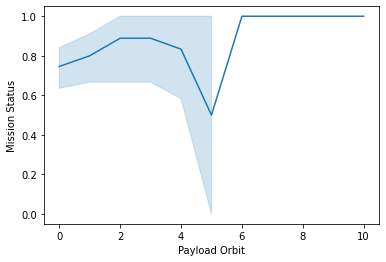

In [43]:
# Payload Orbit
sns.lineplot(x='Payload Orbit', y='Mission Status', data=data)



/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


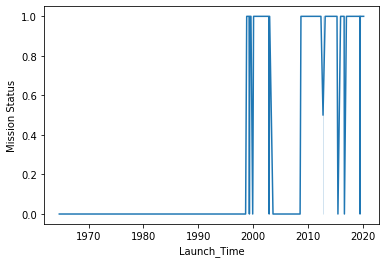

In [44]:
#launch time
sns.lineplot(x='Launch_Time', y='Mission Status', data=data)

#### Most of these variables have unique relationships w/the mission status.
#### For the case of vehicle type, company, Launch Site and Payload Orbit its pretty clearer.

## Model Fitting

In [45]:
#splitting dataset to train and test sets
x = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]]
y = data.iloc[:, -3].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [46]:
# Fitting Random Forest Classification to Training set
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  2],
       [ 0, 24]])

92.8% accurate

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting Naive Bayes Algorithm to Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting Test set results
y_pred = classifier.predict(x_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 5,  1],
       [ 2, 22]])

90% accurate

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting k-NN to Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

# Predicting Test set results
y_pred = classifier.predict(x_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  2],
       [ 0, 24]])

93.3% accurate

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting Logistic Regression to Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(x_train, y_train)


# Predicting Test set results
Y_pred = classifier.predict(x_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  2],
       [ 0, 24]])

93.3% acccurate